# Quantifying Accessibility to Urban Amenities

#### Purpose of this notebook
- 1) Download point, polygon, and pedestrian street networks from openstreetmap
- 2) Classify amenities and points of interests into 7 different categories
- 3) Calculate walking distances from each node in the network to the first nearest category
- 4) Calculate average accessibility (walking distance) by 300m hexagon

In [9]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import osmnx as ox
import pandas as pd
import geopandas as gpd
import pandana as pdna
from pandana.loaders import osm
import pandana as pdna
import matplotlib.pyplot as plt
from shapely import geometry
import fiona
import os
os.chdir(r'C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\UrbanAccessibility_NA')

from src.data.accessibility.urban_access import (create_poi_gdf, amenity_cat_old, create_access_gdf, 
                                            make_hexmap, create_census_access, create_hex_access, access_score) 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
# # Create a pandana network from a bounding box

# MT_network = osm.pdna_network_from_bbox(43.0561, -80.4491, 44.3931, -78.0277, network_type='walk')
# MM_network = osm.pdna_network_from_bbox(45.145, -74.3077, 45.9284, -73.1318, network_type='walk')
# MV_network = osm.pdna_network_from_bbox(49.0039, -123.4715, 49.5672, -122.4432, network_type='walk')
# MO_network = osm.pdna_network_from_bbox(44.9548, -76.4648, 46.0237, -75.1268, network_type='walk')
# ME_network = osm.pdna_network_from_bbox(53.0242, -114.9426, 54.0103, -112.6126, network_type='walk')
# MC_network = osm.pdna_network_from_bbox(50.2284,-114.8995, 51.6327, -113.0863, network_type='walk')
# CHI_network = osm.pdna_network_from_bbox(41.54, -88.0636, 42.1604, -87.3776, network_type='walk')
# NYC_network = osm.pdna_network_from_bbox(40.487648, -74.265829, 40.939408, -73.685202, network_type='walk')
# SF_network = osm.pdna_network_from_bbox(37.677804, -122.556965, 37.826777, -122.327351, network_type='walk')
# MIAMI_network = osm.pdna_network_from_bbox(25.690341, -80.343442, 25.935121, -80.125088, network_type='walk') 
# LANG_network = osm.pdna_network_from_bbox(33.6485, -118.6682, 34.3373, -117.9734, network_type='walk')
# PHILLY_network = osm.pdna_network_from_bbox(39.862668, -75.349327, 40.175655, -74.902733, network_type='walk')
# HOUST_network = osm.pdna_network_from_bbox(29.4323, -95.9652, 30.1503, -94.9336, network_type='walk')
# SE_network = osm.pdna_network_from_bbox(47.481002,-122.459696, 47.776975, -122.224433, network_type='walk')
# PS_network = osm.pdna_network_from_bbox(48.802694,2.216791, 48.913074, 2.479319, network_type='walk')
# SP_network = osm.pdna_network_from_bbox(1.158934,103.533639, 1.493377, 104.085702, network_type='walk')
# LO_network = osm.pdna_network_from_bbox(51.2363,-0.6155, 51.7452, 0.3271, network_type='walk')
# MX_network = osm.pdna_network_from_bbox(19.1753,-99.3806, 19.6183, -98.9264, network_type='walk')
# MEL_network = osm.pdna_network_from_bbox(-38.5394,144.4643, -37.425, 145.4817, network_type='walk')
# SY_network = osm.pdna_network_from_bbox(-34.2092,150.3953, -33.415, 151.4566, network_type='walk') 
# BJ_network = osm.pdna_network_from_bbox(39.499, 115.7581,40.3565, 117.0194, network_type='walk')
# SG_network = osm.pdna_network_from_bbox(30.5534, 120.762,31.6926, 122.1215, network_type='walk') 
# MI_network = osm.pdna_network_from_bbox(45.378735, 9.02931,45.548061, 9.29463, network_type='walk')
# MA_network = osm.pdna_network_from_bbox(40.284948, -3.944036,40.672281, -3.494695, network_type='walk')
# BK_network = osm.pdna_network_from_bbox(13.4607, 100.2014,14.0764, 100.988, network_type='walk')
# IS_network = osm.pdna_network_from_bbox(40.723, 27.8398,41.7195, 30.0107, network_type='walk')
# SO_network = osm.pdna_network_from_bbox(37.375661, 126.745336,37.732323, 127.26444, network_type='walk')
# TK_network = osm.pdna_network_from_bbox(35.516191, 138.935549,35.909066, 139.957396, network_type='walk')
# RO_network = osm.pdna_network_from_bbox(41.6556,12.1496, 42.1652, 12.8703, network_type='walk')
# TP_network = osm.pdna_network_from_bbox(24.948425,121.444997, 25.22553, 121.674886, network_type='walk')
# MB_network = osm.pdna_network_from_bbox(18.880039,72.750584, 19.296795, 72.993734, network_type='walk')
# BA_network = osm.pdna_network_from_bbox(41.288241,2.052498, 41.488147, 2.260204, network_type='walk') 
# AM_network = osm.pdna_network_from_bbox(52.2683,4.7071, 52.4433, 5.0792, network_type='walk')
# BUA_network = osm.pdna_network_from_bbox(-34.730358,-58.654371, -34.488832, -58.280955, network_type='walk') 
# SGO_network = osm.pdna_network_from_bbox(-33.500361,-71.025834, -33.281848, -70.389734, network_type='walk')
# BE_network = osm.pdna_network_from_bbox(52.33826,13.053417, 52.685554, 13.775219, network_type='walk')
# CS_network = osm.pdna_network_from_bbox(33.483502,-7.751639, 33.707027, -7.429696, network_type='walk')
# NA_network = osm.pdna_network_from_bbox(-1.453139,36.631044, -1.142031, 37.11664, network_type='walk')
# RIO_network = osm.pdna_network_from_bbox(-23.085663,-43.80692, -22.746088, -43.134007, network_type='walk')
# CT_network = osm.pdna_network_from_bbox(-34.3989,17.8752,-33.4866, 19.0945, network_type='walk')
# CS_network = osm.pdna_network_from_bbox(33.483502,-7.751639, 33.707027, -7.429696, network_type='walk')
# NA_network = osm.pdna_network_from_bbox(-1.453139,36.631044, -1.142031, 37.11664, network_type='walk')
# RIO_network = osm.pdna_network_from_bbox(-23.085663,-43.80692, -22.746088, -43.134007, network_type='walk')
# CT_network = osm.pdna_network_from_bbox(-34.3989,17.8752,-33.4866, 19.0945, network_type='walk')
# BG_network = osm.pdna_network_from_bbox(4.2719,-74.2811, 4.9334, -73.9304, network_type='walk')
# MLA_network = osm.pdna_network_from_bbox(14.554411,120.938062, 14.642521, 121.028012, network_type='walk')
# MW_network = osm.pdna_network_from_bbox(55.4771,36.8384,56.0666, 38.2444, network_type='walk')
# CP_network = osm.pdna_network_from_bbox(55.605212,12.421774, 55.745886, 12.734246, network_type='walk') 
# AT_network = osm.pdna_network_from_bbox(37.956482,23.684473, 38.0392, 23.797703, network_type='walk')
# BU_network = osm.pdna_network_from_bbox(47.3307,18.8133,47.6626, 19.3361, network_type='walk')
# JK_network = osm.pdna_network_from_bbox(-6.400529,106.65017, -5.995865, 107.037987, network_type='walk') 
# AK_network = osm.pdna_network_from_bbox(-37.3953,173.8963, -35.6984, 175.6249, network_type='walk')
# DU_network = osm.pdna_network_from_bbox(53.237928,-6.488358, 53.538267, -6.062647, network_type='walk')
# WA_network = osm.pdna_network_from_bbox(52.083477,20.779744, 52.368476, 21.32137, network_type='walk')
# ED_network = osm.pdna_network_from_bbox(55.860773,-3.39483, 56.012659, -3.010858, network_type='walk')
# ST_network = osm.pdna_network_from_bbox(59.1589,17.7758, 59.4551, 18.3503, network_type='walk')
# ZU_network = osm.pdna_network_from_bbox(47.321229,8.43922, 47.44044, 8.639446, network_type='walk')
# LB_network = osm.pdna_network_from_bbox(38.686745,-9.248172, 38.806489, -9.081043, network_type='walk')
# HCM_network = osm.pdna_network_from_bbox(10.3528,106.322, 11.1871, 107.0877, network_type='walk')
# LI_network = osm.pdna_network_from_bbox(-12.5377,-77.3569,-11.4757, -76.4726, network_type='walk')
# DHAG_network = osm.pdna_network_from_bbox(52.008378,4.167239,52.157245, 4.449038, network_type='walk')
NTH_network = osm.pdna_network_from_bbox(52.882,-1.220219,53.033342, -1.041692, network_type='walk')

C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Requesting network data within bounding box from Overpass API in 1 request(s)
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](52.88200000,-1.22021900,53.03334200,-1.04169200);>;);out;'}"
Downloaded 0.7KB from www.overpass-api.de in 15.54 seconds
Server at www.overpass-api.de returned status code 504 and no JSON data. Re-trying request in 0.00 seconds.
Posting to http://www.overpass-api.de/api/interpreter with timeout=180, "{'data': '[out:json][timeout:180];(way["highway"]["highway"!~"motor|proposed|construction|abandoned|platform|raceway"]["foot"!~"no"]["pedestrians"!~"no"](52.88200000,-1.22021900,53.03334200,-1.04169200);>;);out;'}"
Downloaded 24,755.7KB from www.overpass-api.de in 9.41 seconds
Downloaded OSM network data within bounding box from Overpass API in 1 request(s) and 25.60 seconds
Returning OSM da

In [13]:
#load city boundary polygons
MTAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/CTAREA.shp")
MTAREA = MTAREA[['geometry']]
MTAREA = MTAREA.to_crs({'init':'epsg:4326'})
MTAREA = ox.project_gdf(MTAREA, to_latlong=True)

MVAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/CVAREA.shp")
MVAREA = MVAREA[['geometry']]
MVAREA = MVAREA.to_crs({'init':'epsg:4326'})
MVAREA = ox.project_gdf(MVAREA, to_latlong=True)

MMAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/CMAREA.shp")
MMAREA = MMAREA[['geometry']]
MMAREA = MMAREA.to_crs({'init':'epsg:4326'})
MMAREA = ox.project_gdf(MMAREA, to_latlong=True)

MCAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/CCAREA.shp")
MCAREA = MCAREA[['geometry']]
MCAREA = ox.project_gdf(MCAREA, to_latlong=True)

MEAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/CEAREA.shp")
MEAREA = MEAREA[['geometry']]
MEAREA = ox.project_gdf(MEAREA, to_latlong=True)

MOAREA = gpd.read_file("data/interim/census/CensusBoundaries_CA/COAREA.shp")
MOAREA = MOAREA[['geometry']]
MOAREA = ox.project_gdf(MOAREA, to_latlong=True)

CHI_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/CHI_AREA.shp")
CHI_AREA = CHI_AREA[['geometry']]
CHI_AREA = ox.project_gdf(CHI_AREA, to_latlong=True)

SF_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/SF_AREA.geojson")
SF_AREA = SF_AREA[['geometry']]
SF_AREA = ox.project_gdf(SF_AREA, to_latlong=True)

MIAMI_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/miami_AREA.geojson")
MIAMI_AREA = MIAMI_AREA[['geometry']]
MIAMI_AREA = ox.project_gdf(MIAMI_AREA, to_latlong=True)

LANG_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/los_angeles_AREA.geojson")
LANG_AREA = LANG_AREA[['geometry']]
LANG_AREA = ox.project_gdf(LANG_AREA, to_latlong=True)

HOUST_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/houston_AREA.geojson")
HOUST_AREA = HOUST_AREA[['geometry']]
HOUST_AREA = ox.project_gdf(HOUST_AREA, to_latlong=True)

PHILLY_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/philadelphia_AREA.geojson")
PHILLY_AREA = PHILLY_AREA[['geometry']]
PHILLY_AREA = ox.project_gdf(PHILLY_AREA, to_latlong=True)
NYC_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/NYC_AREA.shp")
NYC_AREA = NYC_AREA[['geometry']]
NYC_AREA = ox.project_gdf(NYC_AREA, to_latlong=True)
SE_AREA = gpd.read_file("data/interim/census/CensusBoundaries_US/SE_AREA.shp")
SE_AREA = SE_AREA[['geometry']]
SE_AREA = ox.project_gdf(SE_AREA, to_latlong=True)

os.chdir(r'C:\Users\Leonardo\OneDrive\Documents\TU_Delft\CodingProjects\UrbanAccessibility')

PS_AREA = gpd.read_file("data/raw/euro_geographies/france/gadm36_FRA_2.shp")
PS_AREA = PS_AREA[PS_AREA['NAME_2']=='Paris']
PS_AREA = PS_AREA[['geometry']]
PS_AREA = PS_AREA.to_crs({'init':'epsg:4326'})
PS_AREA = ox.project_gdf(PS_AREA, to_latlong=True)

SP_AREA = gpd.read_file("data/raw/asia_geographies/singapore/MP14_REGION_WEB_PL.shp")
SP_AREA['country'] = 'Singapore'
SP_AREA = SP_AREA.dissolve(by='country')
SP_AREA = SP_AREA[['geometry']]
SP_AREA = SP_AREA.to_crs({'init':'epsg:4326'})
SP_AREA = ox.project_gdf(SP_AREA, to_latlong=True)

LO_AREA = gpd.read_file("data/raw/euro_geographies/UK/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
LO_AREA['country'] = 'England'
LO_AREA = LO_AREA.dissolve(by='country')
LO_AREA = LO_AREA[['geometry']]
LO_AREA = LO_AREA.to_crs({'init':'epsg:4326'})
LO_AREA = ox.project_gdf(LO_AREA, to_latlong=True)

MX_AREA = gpd.read_file("data/raw/LA_geographies/mexico/Muni_2012gw.shp")
MX_AREA = MX_AREA[MX_AREA['CVE_ENT']=='09']
MX_AREA['country'] = 'Mexico'
MX_AREA = MX_AREA.dissolve(by='country')
MX_AREA = MX_AREA[['geometry']]
MX_AREA = MX_AREA.to_crs({'init':'epsg:4326'})
MX_AREA = ox.project_gdf(MX_AREA, to_latlong=True)

MEL_AREA = gpd.read_file("data/raw/oceania_geographies/australia/geo_export_c7104f94-ecde-4c0c-8acd-1bc2e3b03c38.shp")
MEL_AREA = MEL_AREA[['geometry']]
MEL_AREA = MEL_AREA.to_crs({'init':'epsg:4326'})
MEL_AREA = ox.project_gdf(MEL_AREA, to_latlong=True)

SY_AREA = gpd.read_file("data/raw/oceania_geographies/australia/The_City_of_Sydney_Local_Government_Area.shp")
SY_AREA = SY_AREA[['geometry']]
SY_AREA = SY_AREA.to_crs({'init':'epsg:4326'})
SY_AREA = ox.project_gdf(SY_AREA, to_latlong=True)

BJ_AREA = gpd.read_file("data/raw/asia_geographies/china/DT38/SpatialCitiesInChina2015.shp")
BJ_AREA = BJ_AREA[BJ_AREA['City_ID']==1023]
BJ_AREA = BJ_AREA[['geometry']]
BJ_AREA = BJ_AREA.to_crs({'init':'epsg:4326'})
BJ_AREA = ox.project_gdf(BJ_AREA, to_latlong=True)

SG_AREA = gpd.read_file("data/raw/asia_geographies/china/DT38/SpatialCitiesInChina2015.shp")
SG_AREA = SG_AREA[SG_AREA['City_ID']==571]
SG_AREA = SG_AREA[['geometry']]
SG_AREA = SG_AREA.to_crs({'init':'epsg:4326'})
SG_AREA = ox.project_gdf(SG_AREA, to_latlong=True)

MI_AREA = gpd.read_file("data/raw/euro_geographies/milan/ds98_infogeo_sezioni_censimento_localizzazione_2011c/Sezioni_Censimento 2011.shp")
MI_AREA['country'] = 'Italy'
MI_AREA = MI_AREA.dissolve(by='country')
MI_AREA = MI_AREA[['geometry']]
MI_AREA = MI_AREA.to_crs({'init':'epsg:4326'})
MI_AREA = ox.project_gdf(MI_AREA, to_latlong=True)

MA_AREA = gpd.read_file("data/raw/euro_geographies/madrid/SHP_ETRS89/DISTRITOS.shp")
MA_AREA['country'] = 'Spain'
MA_AREA = MA_AREA.dissolve(by='country')
MA_AREA = MA_AREA[['geometry']]
MA_AREA = MA_AREA.to_crs({'init':'epsg:4326'})
MA_AREA = ox.project_gdf(MA_AREA, to_latlong=True)

BK_AREA = gpd.read_file("data/raw/asia_geographies/bangkok/bma_zone/bma_zone.shp")
BK_AREA['country'] = 'Thailand'
BK_AREA = BK_AREA.dissolve(by='country')
BK_AREA = BK_AREA[['geometry']]
BK_AREA = BK_AREA.to_crs({'init':'epsg:4326'})
BK_AREA = ox.project_gdf(BK_AREA, to_latlong=True)

IS_AREA = gpd.read_file("data/raw/asia_geographies/turkey/gadm36_TUR_1.shp")
IS_AREA = IS_AREA[IS_AREA['NAME_1']=='Istanbul']
IS_AREA = IS_AREA[['geometry']]
IS_AREA = IS_AREA.to_crs({'init':'epsg:4326'})
IS_AREA = ox.project_gdf(IS_AREA, to_latlong=True)

SO_AREA = gpd.read_file("data/raw/asia_geographies/seoul/gadm36_KOR_1.shp")
SO_AREA = SO_AREA[SO_AREA['NAME_1']=='Seoul']
SO_AREA = SO_AREA[['geometry']]
SO_AREA = SO_AREA.to_crs({'init':'epsg:4326'})
SO_AREA = ox.project_gdf(SO_AREA, to_latlong=True)

TK_AREA = gpd.read_file("data/raw/asia_geographies/japan/gadm36_JPN_1.shp")
TK_AREA = TK_AREA[TK_AREA['NAME_1']=='Tokyo']
TK_AREA = TK_AREA[['geometry']]
TK_AREA = TK_AREA.to_crs({'init':'epsg:4326'})
TK_AREA = ox.project_gdf(TK_AREA, to_latlong=True)

RO_AREA = gpd.read_file("data/raw/euro_geographies/italy/gadm36_ITA_3.shp")
RO_AREA = RO_AREA[RO_AREA['NAME_3']=='Roma']
RO_AREA = RO_AREA[['geometry']]
RO_AREA = RO_AREA.to_crs({'init':'epsg:4326'})
RO_AREA = ox.project_gdf(RO_AREA, to_latlong=True)

TP_AREA = gpd.read_file("data/raw/asia_geographies/taiwan/gadm36_TWN_2.shp")
TP_AREA = TP_AREA[TP_AREA['NAME_2']=='Taipei']
TP_AREA = TP_AREA[['geometry']]
TP_AREA = TP_AREA.to_crs({'init':'epsg:4326'})
TP_AREA = ox.project_gdf(TP_AREA, to_latlong=True)

MB_AREA = gpd.read_file("data/raw/asia_geographies/india/gadm36_IND_2.shp")
MB_AREA = MB_AREA[MB_AREA['NAME_2']=='Mumbai City']
MB_AREA = MB_AREA[['geometry']]
MB_AREA = MB_AREA.to_crs({'init':'epsg:4326'})
MB_AREA = ox.project_gdf(MB_AREA, to_latlong=True)

BA_AREA = gpd.read_file("data/raw/euro_geographies/spain/gadm36_ESP_4.shp")
BA_AREA = BA_AREA[BA_AREA['NAME_4']=='Barcelona']
BA_AREA = BA_AREA[['geometry']]
BA_AREA = BA_AREA.to_crs({'init':'epsg:4326'})
BA_AREA = ox.project_gdf(BA_AREA, to_latlong=True)

AM_AREA = gpd.read_file("data/raw/euro_geographies/netherlands/gadm36_NLD_2.shp")
AM_AREA = AM_AREA[AM_AREA['NAME_2']=='Amsterdam']
AM_AREA = AM_AREA[['geometry']]
AM_AREA = AM_AREA.to_crs({'init':'epsg:4326'})
AM_AREA = ox.project_gdf(AM_AREA, to_latlong=True)

BUA_AREA = gpd.read_file("data/raw/LA_geographies/argentina/gadm36_ARG_2.shp")
BUA_AREA = BUA_AREA[BUA_AREA['NAME_1']=='Ciudad de Buenos Aires']
BUA_AREA = BUA_AREA[['geometry']]
BUA_AREA = BUA_AREA.to_crs({'init':'epsg:4326'})
BUA_AREA = ox.project_gdf(BUA_AREA, to_latlong=True)

SGO_AREA = gpd.read_file("data/raw/LA_geographies/chile/gadm36_CHL_3.shp")
SGO_AREA = SGO_AREA[SGO_AREA['NAME_2']=='Santiago']
SGO_AREA = SGO_AREA[['geometry']]
SGO_AREA = SGO_AREA.to_crs({'init':'epsg:4326'})
SGO_AREA = ox.project_gdf(SGO_AREA, to_latlong=True)


BE_AREA = gpd.read_file("data/raw/euro_geographies/germany/gadm36_DEU_3.shp")
BE_AREA = BE_AREA[BE_AREA['NAME_1']=='Berlin']
BE_AREA = BE_AREA[['geometry']]
BE_AREA = BE_AREA.to_crs({'init':'epsg:4326'})
BE_AREA = ox.project_gdf(BE_AREA, to_latlong=True)

CS_AREA = gpd.read_file("data/raw/africa_geographies/gadm36_MAR_2.shp")
CS_AREA = CS_AREA[CS_AREA['NAME_2']=='Casablanca']
CS_AREA = CS_AREA[['geometry']]
CS_AREA = CS_AREA.to_crs({'init':'epsg:4326'})
CS_AREA = ox.project_gdf(CS_AREA, to_latlong=True)

NA_AREA = gpd.read_file("data/raw/africa_geographies/gadm36_KEN_1.shp")
NA_AREA = NA_AREA[NA_AREA['NAME_1']=='Nairobi']
NA_AREA = NA_AREA[['geometry']]
NA_AREA = NA_AREA.to_crs({'init':'epsg:4326'})
NA_AREA = ox.project_gdf(NA_AREA, to_latlong=True)

RIO_AREA = gpd.read_file("data/raw/LA_geographies/gadm36_BRA_2.shp")
RIO_AREA = RIO_AREA[RIO_AREA['NAME_2']=='Rio de Janeiro']
RIO_AREA = RIO_AREA[['geometry']]
RIO_AREA = RIO_AREA.to_crs({'init':'epsg:4326'})
RIO_AREA = ox.project_gdf(RIO_AREA, to_latlong=True)

CT_AREA = gpd.read_file("data/raw/africa_geographies/gadm36_ZAF_2.shp")
CT_AREA = CT_AREA[CT_AREA['NAME_2']=='City of Cape Town']
CT_AREA = CT_AREA[['geometry']]
CT_AREA = CT_AREA.to_crs({'init':'epsg:4326'})
CT_AREA = ox.project_gdf(CT_AREA, to_latlong=True)

MLA_AREA = gpd.read_file("data/raw/asia_geographies/philippines/gadm36_PHL_2.shp")
MLA_AREA = MLA_AREA[MLA_AREA['NAME_2']=='Manila']
MLA_AREA = MLA_AREA[['geometry']]
MLA_AREA = MLA_AREA.to_crs({'init':'epsg:4326'})
MLA_AREA = ox.project_gdf(MLA_AREA, to_latlong=True)

MW_AREA = gpd.read_file("data/raw/asia_geographies/russia/gadm36_RUS_1.shp")
MW_AREA = MW_AREA[MW_AREA['NAME_1']=='Moscow City']
MW_AREA = MW_AREA[['geometry']]
MW_AREA = MW_AREA.to_crs({'init':'epsg:4326'})
MW_AREA = ox.project_gdf(MW_AREA, to_latlong=True)

BG_AREA = gpd.read_file("data/raw/LA_geographies/colombia/gadm36_COL_2.shp")
BG_AREA = BG_AREA[BG_AREA['NAME_2']=='Santafé de Bogotá']
BG_AREA = BG_AREA[['geometry']]
BG_AREA = BG_AREA.to_crs({'init':'epsg:4326'})
BG_AREA = ox.project_gdf(BG_AREA, to_latlong=True)

CP_AREA = gpd.read_file("data/raw/euro_geographies/denmark/gadm36_DNK_2.shp")
CP_AREA = CP_AREA[CP_AREA['NAME_2']=='København']
CP_AREA = CP_AREA[['geometry']]
CP_AREA = CP_AREA.to_crs({'init':'epsg:4326'})
CP_AREA = ox.project_gdf(CP_AREA, to_latlong=True)

AT_AREA = gpd.read_file("data/raw/euro_geographies/greece/gadm36_GRC_3.shp")
AT_AREA = AT_AREA[AT_AREA['NAME_3']=='Athens']
AT_AREA = AT_AREA[['geometry']]
AT_AREA = AT_AREA.to_crs({'init':'epsg:4326'})
AT_AREA = ox.project_gdf(AT_AREA, to_latlong=True)

BU_AREA = gpd.read_file("data/raw/euro_geographies/hungary/gadm36_HUN_2.shp")
BU_AREA = BU_AREA[BU_AREA['NAME_2']=='Budapesti']
BU_AREA = BU_AREA[['geometry']]
BU_AREA = BU_AREA.to_crs({'init':'epsg:4326'})
BU_AREA = ox.project_gdf(BU_AREA, to_latlong=True)

JK_AREA = gpd.read_file("data/raw/asia_geographies/indonesia/gadm36_IDN_1.shp")
JK_AREA = JK_AREA[JK_AREA['NAME_1']=='Jakarta Raya']
JK_AREA = JK_AREA[['geometry']]
JK_AREA = JK_AREA.to_crs({'init':'epsg:4326'})
JK_AREA = ox.project_gdf(JK_AREA, to_latlong=True)

AK_AREA = gpd.read_file("data/raw/oceania_geographies/NZ/gadm36_NZL_2.shp")
AK_AREA = AK_AREA[AK_AREA['NAME_2']=='Auckland']
AK_AREA = AK_AREA[['geometry']]
AK_AREA = AK_AREA.to_crs({'init':'epsg:4326'})
AK_AREA = ox.project_gdf(AK_AREA, to_latlong=True)

DU_AREA = gpd.read_file("data/raw/euro_geographies/ireland/gadm36_IRL_1.shp")
DU_AREA = DU_AREA[DU_AREA['NAME_1']=='Dublin']
DU_AREA = DU_AREA[['geometry']]
DU_AREA = DU_AREA.to_crs({'init':'epsg:4326'})
DU_AREA = ox.project_gdf(DU_AREA, to_latlong=True)

WA_AREA = gpd.read_file("data/raw/euro_geographies/poland/gadm36_POL_2.shp")
WA_AREA = WA_AREA[WA_AREA['NAME_2']=='Warszawa']
WA_AREA = WA_AREA[['geometry']]
WA_AREA = WA_AREA.to_crs({'init':'epsg:4326'})
WA_AREA = ox.project_gdf(WA_AREA, to_latlong=True)

ED_AREA = gpd.read_file("data/raw/euro_geographies/UK/gadm36_GBR_2.shp")
ED_AREA = ED_AREA[ED_AREA['NAME_2']=='Edinburgh']
ED_AREA = ED_AREA[['geometry']]
ED_AREA = ED_AREA.to_crs({'init':'epsg:4326'})
ED_AREA = ox.project_gdf(ED_AREA, to_latlong=True)

ST_AREA = gpd.read_file("data/raw/euro_geographies/sweden/gadm36_SWE_2.shp")
ST_AREA = ST_AREA[ST_AREA['NAME_2']=='Stockholm']
ST_AREA = ST_AREA[['geometry']]
ST_AREA = ST_AREA.to_crs({'init':'epsg:4326'})
ST_AREA = ox.project_gdf(ST_AREA, to_latlong=True)

ZU_AREA = gpd.read_file("data/raw/euro_geographies/switzerland/gadm36_CHE_2.shp")
ZU_AREA = ZU_AREA[ZU_AREA['NAME_2']=='Zürich']
ZU_AREA = ZU_AREA[['geometry']]
ZU_AREA = ZU_AREA.to_crs({'init':'epsg:4326'})
ZU_AREA = ox.project_gdf(ZU_AREA, to_latlong=True)

LB_AREA = gpd.read_file("data/raw/euro_geographies/portugal/gadm36_PRT_2.shp")
LB_AREA = LB_AREA[LB_AREA['NAME_2']=='Lisboa']
LB_AREA = LB_AREA[['geometry']]
LB_AREA = LB_AREA.to_crs({'init':'epsg:4326'})
LB_AREA = ox.project_gdf(LB_AREA, to_latlong=True)

HCM_AREA = gpd.read_file("data/raw/asia_geographies/vietnam/gadm36_VNM_1.shp")
HCM_AREA = HCM_AREA[HCM_AREA['NAME_1']=='Hồ Chí Minh']
HCM_AREA = HCM_AREA[['geometry']]
HCM_AREA = HCM_AREA.to_crs({'init':'epsg:4326'})
HCM_AREA = ox.project_gdf(HCM_AREA, to_latlong=True)

LI_AREA = gpd.read_file("data/raw/LA_geographies/peru/gadm36_PER_2.shp")
LI_AREA = LI_AREA[LI_AREA['NAME_2']=='Lima']
LI_AREA = LI_AREA[['geometry']]
LI_AREA = LI_AREA.to_crs({'init':'epsg:4326'})
LI_AREA = ox.project_gdf(LI_AREA, to_latlong=True)

DHAG_AREA = ox.gdf_from_place('The Hague')
NTH_AREA = ox.gdf_from_place('Nottingham')

admin_ls = [AK_AREA, AM_AREA, AT_AREA, BA_AREA, BE_AREA, BG_AREA, BJ_AREA, BK_AREA, BUA_AREA, BU_AREA,
            CHI_AREA, CP_AREA, CS_AREA, CT_AREA, DHAG_AREA, DU_AREA, ED_AREA, HCM_AREA, HOUST_AREA, IS_AREA, JK_AREA, LANG_AREA, LB_AREA, 
            LI_AREA, LO_AREA, MA_AREA, MCAREA, MEAREA, MEL_AREA, MI_AREA, MIAMI_AREA, MLA_AREA, MMAREA, MOAREA, MTAREA, 
            MVAREA, MW_AREA, MX_AREA, NA_AREA, NTH_AREA, NYC_AREA, PHILLY_AREA, PS_AREA, RIO_AREA, RO_AREA, SE_AREA, SF_AREA, SGO_AREA, 
            SG_AREA, SO_AREA, SP_AREA, ST_AREA, SY_AREA, TK_AREA, TP_AREA, WA_AREA, ZU_AREA]

# admin_bounds = pd.concat(admin_ls)
# admin_bounds['coverage'] = '49_cities'
# admin_bounds = admin_bounds.dissolve(by='coverage')
# admin_bounds.to_file('data/raw/world/citybounds_mask.json', driver="GeoJSON")

C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Leonardo\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis or

DriverError: data/raw/euro_geographies/milan/ds98_infogeo_sezioni_censimento_localizzazione_2011c/Sezioni_Censimento 2011.shp: No such file or directory

In [15]:
def create_poi_gdf(MAREA = None):
    
    '''Downloads public transport, parks, and urban amenities from OpenStreetMap, classifies them into seven distinct categories, and
    outputs a point geodataframe'''
    
    ##public transport
    #get public transport (rail) network of metro vancouver
    rail = ox.graph_from_polygon(MAREA.iloc[0,0], network_type='all',
                                  infrastructure='way["railway"]', retain_all=True)
    #make rail pois
    rail_gdf = ox.save_load.graph_to_gdfs(rail, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=True)
    rail_gdf['amenity'] = 'transit_stop'
    rail_gdf = rail_gdf[['amenity', 'geometry']]

    #get public bus stops
    bus = ox.footprints.footprints_from_polygon(polygon = MAREA.iloc[0,0], footprint_type = 'public_transport')
    bus['amenity'] = 'public_transport'
    bus['centroid'] = bus.centroid
    bus = bus.set_geometry('centroid')
    bus = bus[['amenity', 'centroid']]
    bus = bus.rename(columns = {"centroid": "geometry"})

    ##amenities pois
    # define your selected amenities
    amenities = ["transit_stop", "bus_station", "bus_stop", "bicycle_parking", "gym", "park", "pub", "bar", "theatre", 
                 "cinema", "nightclub", "events_venue", "restaurant", "cafe", "food_court", "marketplace", "community_centre", 
                 "library", "social_facility", "social_centre", "townhall", "school", "childcare", "child_care", "kindergarten",
                 "university", "college", "pharmacy", "dentist", "clinic", "hospital", "doctors", "bank"]

    #request amenities from the OpenStreetMap API (Overpass)
    pois = ox.pois_from_polygon(MAREA.iloc[0,0])
    pois = pois[pois['amenity'].isin(amenities)]
    pois = pois[['amenity','geometry']]

    #get parks and "leisure" elements
    leisure = ["fitness_centre", "sports_centre", "park", "pitch", "playground", "swimming_pool", "garden", "golf_course", "sports_centre", 
               "ice_rink", "dog_park", "nature_reserve", "fitness_centre", "marina", "recreation_ground", "fitness_station", "skate_park"]

    parks = ox.footprints.footprints_from_polygon(polygon = MAREA.iloc[0,0], footprint_type = 'leisure')
    parks = parks[parks['leisure'].isin(leisure)]
    parks['centroid'] = parks.centroid
    parks = parks.set_geometry('centroid')
    parks = parks[['leisure','centroid']]
    parks = parks.rename(columns = {"leisure":"amenity","centroid": "geometry"})

    #merge all the dataframes together
    #merge dataframes together
    pois_list = [pois,rail_gdf, bus, parks]
    pois_all = pd.concat(pois_list, axis=0, ignore_index=True)

    #create x and y columns for network analysis
    pois_all['x'] = pois_all.centroid.x
    pois_all['y'] = pois_all.centroid.y
    
    pois_all['centroid'] = pois_all.centroid
    pois_all = pois_all.set_geometry('centroid')
    pois_all = pois_all[['amenity', 'x', 'y','centroid']]
    pois_all = pois_all.rename(columns = {"centroid": "geometry"})
    pois_all = pois_all.set_geometry('geometry')
    
    return pois_all

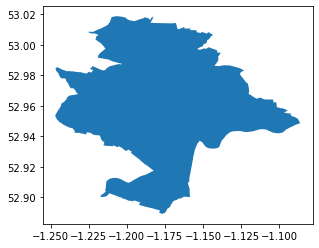

In [11]:
%matplotlib inline
NTH_AREA.plot()

In [6]:
#download pois for all cities
# MTAREA_pois = create_poi_gdf(MAREA = MTAREA)
# MMAREA_pois = create_poi_gdf(MAREA = MMAREA)
# MVAREA_pois = create_poi_gdf(MAREA = MVAREA)
# MCAREA_pois = create_poi_gdf(MAREA = MCAREA)
# MEAREA_pois = create_poi_gdf(MAREA = MEAREA)
# MOAREA_pois = create_poi_gdf(MAREA = MOAREA)
# NYCAREA_pois = create_poi_gdf(MAREA = NYC_AREA)
# CHIAREA_pois = create_poi_gdf(MAREA = CHI_AREA)
# SEAREA_pois = create_poi_gdf(MAREA = SE_AREA)
# SFAREA_pois = create_poi_gdf(MAREA = SF_AREA)
# MIAMIAREA_pois = create_poi_gdf(MAREA = MIAMI_AREA)
# LANGAREA_pois = create_poi_gdf(MAREA = LANG_AREA)
# HOUSTAREA_pois = create_poi_gdf(MAREA = HOUST_AREA)
# PHILLYAREA_pois = create_poi_gdf(MAREA = PHILLY_AREA)
# PS_AREA_pois = create_poi_gdf(MAREA = PS_AREA)
# SPAREA_pois = create_poi_gdf(MAREA = SP_AREA)
# LOAREA_pois = create_poi_gdf(MAREA = LO_AREA)
# MXAREA_pois = create_poi_gdf(MAREA = MX_AREA)
# SY_AREA_pois = create_poi_gdf(MAREA = SY_AREA)
# MEL_AREA_pois = create_poi_gdf(MAREA = MEL_AREA)
# BJ_AREA_pois = create_poi_gdf(MAREA = BJ_AREA)
# SG_AREA_pois = create_poi_gdf(MAREA = SG_AREA)
# MA_AREA_pois = create_poi_gdf(MAREA = MA_AREA)
# MI_AREA_pois = create_poi_gdf(MAREA = MI_AREA)
# BK_AREA_pois = create_poi_gdf(MAREA = BK_AREA)
# IS_AREA_pois = create_poi_gdf(MAREA = IS_AREA)
# SO_AREA_pois = create_poi_gdf(MAREA = SO_AREA)
# TK_AREA_pois = create_poi_gdf(MAREA = TK_AREA)
# RO_AREA_pois = create_poi_gdf(MAREA = RO_AREA)
# TP_AREA_pois = create_poi_gdf(MAREA = TP_AREA)
# MB_AREA_pois = create_poi_gdf(MAREA = MB_AREA)
# BA_AREA_pois = create_poi_gdf(MAREA = BA_AREA)
# AM_AREA_pois = create_poi_gdf(MAREA = AM_AREA)
# BUA_AREA_pois = create_poi_gdf(MAREA = BUA_AREA)
# SGO_AREA_pois = create_poi_gdf(MAREA = SGO_AREA)
# BE_AREA_pois = create_poi_gdf(MAREA = BE_AREA)
# CS_AREA_pois = create_poi_gdf(MAREA = CS_AREA)
# NA_AREA_pois = create_poi_gdf(MAREA = NA_AREA)
# RIO_AREA_pois = create_poi_gdf(MAREA = RIO_AREA)
# CT_AREA_pois = create_poi_gdf(MAREA = CT_AREA)
# MLA_AREA_pois = create_poi_gdf(MAREA = MLA_AREA)
# MW_AREA_pois = create_poi_gdf(MAREA = MW_AREA)
# BG_AREA_pois = create_poi_gdf(MAREA = BG_AREA)
# CP_AREA_pois = create_poi_gdf(MAREA = CP_AREA)
# AT_AREA_pois = create_poi_gdf(MAREA = AT_AREA)
# BU_AREA_pois = create_poi_gdf(MAREA = BU_AREA)
# JK_AREA_pois = create_poi_gdf(MAREA = JK_AREA)
# AK_AREA_pois = create_poi_gdf(MAREA = AK_AREA)
# DU_AREA_pois = create_poi_gdf(MAREA = DU_AREA)
# WA_AREA_pois = create_poi_gdf(MAREA = WA_AREA)
# ED_AREA_pois = create_poi_gdf(MAREA = ED_AREA)
# ST_AREA_pois = create_poi_gdf(MAREA = ST_AREA)
# ZU_AREA_pois = create_poi_gdf(MAREA = ZU_AREA)
# LB_AREA_pois = create_poi_gdf(MAREA = LB_AREA)
# HCM_AREA_pois = create_poi_gdf(MAREA = HCM_AREA)
# LI_AREA_pois = create_poi_gdf(MAREA = LI_AREA)
# DHAG_AREA_pois = create_poi_gdf(MAREA = DHAG_AREA)
NTH_AREA_pois = create_poi_gdf(MAREA = NTH_AREA)

In [13]:
# MTAREA_pois_df = MTAREA_pois[['amenity', 'x', 'y']]
# MMAREA_pois_df = MMAREA_pois[['amenity', 'x', 'y']]
# MVAREA_pois_df = MVAREA_pois[['amenity', 'x', 'y']]
# MCAREA_pois_df = MCAREA_pois[['amenity', 'x', 'y']]
# MEAREA_pois_df = MEAREA_pois[['amenity', 'x', 'y']]
# MOAREA_pois_df = MOAREA_pois[['amenity', 'x', 'y']]
# CHIAREA_pois_df = CHIAREA_pois[['amenity', 'x', 'y']]
# NYCAREA_pois_df = NYCAREA_pois[['amenity', 'x', 'y']]
# SEAREA_pois_df = SEIAREA_pois[['amenity', 'x', 'y']]
# SFAREA_pois_df = SFAREA_pois[['amenity', 'x', 'y']]
# MIAMI_pois_df = MIAMIAREA_pois[['amenity', 'x', 'y']]
# LANG_pois_df = LANGAREA_pois[['amenity', 'x', 'y']]
# HOUST_pois_df = HOUSTAREA_pois[['amenity', 'x', 'y']]
# PHILLY_pois_df = PHILLYAREA_pois[['amenity', 'x', 'y']]
# PS_AREA_pois_df = PS_AREA_pois[['amenity', 'x', 'y']]
# SPAREA_pois_df = SPAREA_pois[['amenity', 'x', 'y']]
# LOAREA_pois_df = LOAREA_pois[['amenity', 'x', 'y']]
# MXAREA_pois_df = MXAREA_pois[['amenity', 'x', 'y']]
# SY_AREA_pois_df = SY_AREA_pois[['amenity', 'x', 'y']]
# MEL_AREA_pois_df = MEL_AREA_pois[['amenity', 'x', 'y']]
# BJ_AREA_pois_df = BJ_AREA_pois[['amenity', 'x', 'y']]
# SG_AREA_pois_df = SG_AREA_pois[['amenity', 'x', 'y']]
# MA_AREA_pois_df = MA_AREA_pois[['amenity', 'x', 'y']]
# MI_AREA_pois_df = MI_AREA_pois[['amenity', 'x', 'y']]
# BK_AREA_pois_df = BK_AREA_pois[['amenity', 'x', 'y']]
# IS_AREA_pois_df = IS_AREA_pois[['amenity', 'x', 'y']]
# SO_AREA_pois_df = SO_AREA_pois[['amenity', 'x', 'y']]
# TK_AREA_pois_df = TK_AREA_pois[['amenity', 'x', 'y']]
# RO_AREA_pois_df = RO_AREA_pois[['amenity', 'x', 'y']]
# TP_AREA_pois_df = TP_AREA_pois[['amenity', 'x', 'y']]
# MB_AREA_pois_df = MB_AREA_pois[['amenity', 'x', 'y']]
# BA_AREA_pois_df = BA_AREA_pois[['amenity', 'x', 'y']]
# AM_AREA_pois_df = AM_AREA_pois[['amenity', 'x', 'y']]
# BUA_AREA_pois_df = BUA_AREA_pois[['amenity', 'x', 'y']]
# SGO_AREA_pois_df = SGO_AREA_pois[['amenity', 'x', 'y']]
# BE_AREA_pois_df = BE_AREA_pois[['amenity', 'x', 'y']]
# CS_AREA_pois_df = CS_AREA_pois[['amenity', 'x', 'y']]
# NA_AREA_pois_df = NA_AREA_pois[['amenity', 'x', 'y']]
# RIO_AREA_pois_df = RIO_AREA_pois[['amenity', 'x', 'y']]
# CT_AREA_pois_df = CT_AREA_pois[['amenity', 'x', 'y']]
# MW_AREA_pois_df = MW_AREA_pois[['amenity', 'x', 'y']]
# MLA_AREA_pois_df = MLA_AREA_pois[['amenity', 'x', 'y']]
# BG_AREA_pois_df = BG_AREA_pois[['amenity', 'x', 'y']]
# CP_AREA_pois_df = CP_AREA_pois[['amenity', 'x', 'y']]
# AT_AREA_pois_df = AT_AREA_pois[['amenity', 'x', 'y']]
# BU_AREA_pois_df = BU_AREA_pois[['amenity', 'x', 'y']]
# JK_AREA_pois_df = JK_AREA_pois[['amenity', 'x', 'y']]
# AK_AREA_pois_df = AK_AREA_pois[['amenity', 'x', 'y']]
# DU_AREA_pois_df = DU_AREA_pois[['amenity', 'x', 'y']]
# WA_AREA_pois_df = WA_AREA_pois[['amenity', 'x', 'y']]
# ED_AREA_pois_df = ED_AREA_pois[['amenity', 'x', 'y']]
# ST_AREA_pois_df = ST_AREA_pois[['amenity', 'x', 'y']]
# ZU_AREA_pois_df = ZU_AREA_pois[['amenity', 'x', 'y']]
# LB_AREA_pois_df = LB_AREA_pois[['amenity', 'x', 'y']]
# HCM_AREA_pois_df = HCM_AREA_pois[['amenity', 'x', 'y']]
# LI_AREA_pois_df = LI_AREA_pois[['amenity', 'x', 'y']]
# DHAG_AREA_pois_df = DHAG_AREA_pois[['amenity', 'x', 'y']]
NTH_AREA_pois_df = NTH_AREA_pois[['amenity', 'x', 'y']]

In [14]:
#save pois for each city so we dont have to download them again
# MTAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MTAREA_pois.csv")
# MMAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MMAREA_pois.csv")
# MVAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MVAREA_pois.csv")
# MCAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MCAREA_pois.csv")
# MEAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MEAREA_pois.csv")
# MOAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MOAREA_pois.csv")
# CHIAREA_pois_df.to_csv("data/interim/accessibility/new/pois/tables/CHIAREA_pois.csv")
# NYCAREA_pois_df.to_csv("data/interim/accessibility/new/pois/tables/NYCAREA_pois.csv")
# SEAREA_pois_df.to_csv("data/interim/accessibility/pois/tables/SEAREA_pois.csv")
# SFAREA_pois_df.to_csv("../../data/processed/accessibility/pois/tables/SFAREA_pois.csv")
# MIAMI_pois_df.to_csv("../../data/processed/accessibility/pois/tables/MIAMI_pois.csv")
# LANG_pois_df.to_csv("../../data/processed/accessibility/pois/tables/LANG_pois.csv")
# HOUST_pois_df.to_csv("../../data/processed/accessibility/pois/tables/HOUST_pois.csv")
# PHILLY_pois_df.to_csv("../../data/processed/accessibility/pois/tables/PHILLY_pois.csv")
# PS_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/PS_AREA_pois.csv")
# SPAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/SPAREA_pois.csv")
# LOAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/LOAREA_pois.csv")
# MXAREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MXAREA_pois.csv")
# BJ_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BJ_AREA_pois_df.csv")
# SG_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/SG_AREA_pois_df.csv")
# MA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MA_AREA_pois_df.csv")
# MI_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MI_AREA_pois_df.csv")
# BK_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BK_AREA_pois_df.csv")
# IS_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/IS_AREA_pois_df.csv")
# SO_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/SO_AREA_pois_df.csv")
# TK_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/TK_AREA_pois_df.csv")
# RO_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/RO_AREA_pois_df.csv")
# TP_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/TP_AREA_pois_df.csv")
# MB_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MB_AREA_pois_df.csv")
# BA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BA_AREA_pois_df.csv")
# AM_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/AM_AREA_pois_df.csv")
# BUA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BUA_AREA_pois_df.csv")
# SGO_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/SGO_AREA_pois_df.csv")
# BE_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BE_AREA_pois_df.csv")
# CS_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/CS_AREA_pois_df.csv")
# NA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/NA_AREA_pois_df.csv")
# RIO_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/RIO_AREA_pois_df.csv")
# CT_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/CT_AREA_pois_df.csv")
# MW_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MW_AREA_pois_df.csv")
# MLA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/MLA_AREA_pois_df.csv")
# CP_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/CP_AREA_pois_df.csv")
# AT_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/AT_AREA_pois_df.csv")
# BU_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/BU_AREA_pois_df.csv")
# JK_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/JK_AREA_pois_df.csv")
# AK_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/AK_AREA_pois_df.csv")
# DU_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/DU_AREA_pois_df.csv")
# WA_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/WA_AREA_pois_df.csv")
# ED_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/ED_AREA_pois_df.csv")
# ST_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/ST_AREA_pois_df.csv")
# ZU_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/ZU_AREA_pois_df.csv")
# LB_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/LB_AREA_pois_df.csv")
# HCM_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/HCM_AREA_pois_df.csv")
# LI_AREA_pois_df.to_csv("data/interim/accessibility/old/pois/tables/LI_AREA_pois_df.csv")
# DHAG_AREA_pois_df.to_csv("../../data/processed/accessibility/pois/tables/DHAG_pois.csv")
NTH_AREA_pois_df.to_csv("../../data/processed/accessibility/pois/tables/NTH_pois.csv")

In [15]:
#save pois for each city so we dont have to download them again
# MTAREA_pois.to_file("data/interim/accessibility/old/pois/points/MTAREA_pois.shp")
# MMAREA_pois.to_file("data/interim/accessibility/old/pois/points/MMAREA_pois.shp")
# MVAREA_pois.to_file("data/interim/accessibility/old/pois/points/MVAREA_pois.shp")
# MCAREA_pois.to_file("data/interim/accessibility/old/pois/points/MCAREA_pois.shp")
# MEAREA_pois.to_file("data/interim/accessibility/old/pois/points/MEAREA_pois.shp")
# MOAREA_pois.to_file("data/interim/accessibility/old/pois/points/MOAREA_pois.shp")
# NYCAREA_pois.to_file("data/interim/accessibility/new/pois/points/NYCAREA_pois.shp")
# CHIAREA_pois.to_file("data/interim/accessibility/new/pois/points/CHIAREA_pois.shp")
# SEAREA_pois.to_file("data/interim/accessibility/pois/points/SEAREA_pois.shp")
# SFAREA_pois.to_file("../../data/processed/accessibility/pois/points/SFAREA_pois.shp")
# MIAMIAREA_pois.to_file("../../data/processed/accessibility/pois/points/MIAMI_pois.shp")
# LANGAREA_pois.to_file("../../data/processed/accessibility/pois/points/LANG_pois.shp")
# HOUSTAREA_pois.to_file("../../data/processed/accessibility/pois/points/HOUST_pois.shp")
# PHILLYAREA_pois.to_file("../../data/processed/accessibility/pois/points/PHILLY_pois.shp")
# PS_AREA_pois.to_file("data/interim/accessibility/old/pois/points/PS_AREA_pois.shp")
# SPAREA_pois.to_file("data/interim/accessibility/old/pois/points/SPAREA_pois.shp")
# LOAREA_pois.to_file("data/interim/accessibility/old/pois/points/LOAREA_pois.shp")
# MXAREA_pois.to_file("data/interim/accessibility/old/pois/points/MXAREA_pois.shp")
# BJ_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BJ_AREA_pois.shp")
# SG_AREA_pois.to_file("data/interim/accessibility/old/pois/points/SG_AREA_pois.shp")
# MA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/MA_AREA_pois.shp")
# MI_AREA_pois.to_file("data/interim/accessibility/old/pois/points/MI_AREA_pois.shp")
# BK_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BK_AREA_pois.shp")
# IS_AREA_pois.to_file("data/interim/accessibility/old/pois/points/IS_AREA_pois.shp")
# SO_AREA_pois.to_file("data/interim/accessibility/old/pois/points/SO_AREA_pois.shp")
# TK_AREA_pois.to_file("data/interim/accessibility/old/pois/points/TK_AREA_pois.shp")
# RO_AREA_pois.to_file("data/interim/accessibility/old/pois/points/RO_AREA_pois.shp")
# TP_AREA_pois.to_file("data/interim/accessibility/old/pois/points/TP_AREA_pois.shp")
# MB_AREA_pois.to_file("data/interim/accessibility/old/pois/points/MB_AREA_pois.shp")
# BA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BA_AREA_pois.shp")
# AM_AREA_pois.to_file("data/interim/accessibility/old/pois/points/AM_AREA_pois.shp")
# BUA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BUA_AREA_pois.shp")
# SGO_AREA_pois.to_file("data/interim/accessibility/old/pois/points/SGO_AREA_pois.shp")
# BE_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BE_AREA_pois.shp")
# CS_AREA_pois.to_file("data/interim/accessibility/old/pois/points/CS_AREA_pois.shp")
# NA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/NA_AREA_pois.shp")
# RIO_AREA_pois.to_file("data/interim/accessibility/old/pois/points/RIO_AREA_pois.shp")
# CT_AREA_pois.to_file("data/interim/accessibility/old/pois/points/CT_AREA_pois.shp")
# MW_AREA_pois.to_file("data/interim/accessibility/old/pois/points/MW_AREA_pois.shp")
# MLA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/MLA_AREA_pois.shp")
# CP_AREA_pois.to_file("data/interim/accessibility/old/pois/points/CP_AREA_pois.shp")
# AT_AREA_pois.to_file("data/interim/accessibility/old/pois/points/AT_AREA_pois.shp")
# BU_AREA_pois.to_file("data/interim/accessibility/old/pois/points/BU_AREA_pois.shp")
# JK_AREA_pois.to_file("data/interim/accessibility/old/pois/points/JK_AREA_pois.shp")
# AK_AREA_pois.to_file("data/interim/accessibility/old/pois/points/AK_AREA_pois.shp")
# DU_AREA_pois.to_file("data/interim/accessibility/old/pois/points/DU_AREA_pois.shp")
# WA_AREA_pois.to_file("data/interim/accessibility/old/pois/points/WA_AREA_pois.shp")
# ED_AREA_pois.to_file("data/interim/accessibility/old/pois/points/ED_AREA_pois.shp")
# ST_AREA_pois.to_file("data/interim/accessibility/old/pois/points/ST_AREA_pois.shp")
# ZU_AREA_pois.to_file("data/interim/accessibility/old/pois/points/ZU_AREA_pois.shp")
# LB_AREA_pois.to_file("data/interim/accessibility/old/pois/points/LB_AREA_pois.shp")
# HCM_AREA_pois.to_file("data/interim/accessibility/old/pois/points/HCM_AREA_pois.shp")
# LI_AREA_pois.to_file("data/interim/accessibility/old/pois/points/LI_AREA_pois.shp")
# DHAG_AREA_pois.to_file("../../data/processed/accessibility/pois/points/DHAG_pois.shp")
NTH_AREA_pois.to_file("../../data/processed/accessibility/pois/points/NTH_pois.shp")

In [7]:
# function to aggregate amenities into categories: USE THIS FOR METHOD NUMBER 1 (agreggate first, then measure access)
def amenity_cat_old(pois_all = None):
    '''Aggregates amenities into seven distinct categories.'''
    
    # reshape dataframe
#     pois_all = pd.melt(pois_df, id_vars=['osmid', 'geometry', 'x', 'y'], var_name='amenity')
    # define categories
    mobility = ["transit_stop", "bus_station", "bus_stop", "public_transport"]

    active_living = ["bicycle_parking", "gym", "fitness_centre", "sports_centre", "park", "pitch", "playground", "swimming_pool", 
                     "garden", "golf_course", "sports_centre","ice_rink", "dog_park", "nature_reserve", "fitness_centre", "marina", 
                     "recreation_ground", "fitness_station", "skate_park"]

    nightlife = ["pub", "bar", "theatre", "cinema", "nightclub", "events_venue"]

    food_choices = ["restaurant", "cafe", "food_court", "marketplace"]

    community_space = ["community_centre", "library", "social_facility", "social_centre", "townhall"]

    education = ["school", "childcare", "child_care", "kindergarten", "university", "college"]

    health_wellbeing = ["pharmacy", "dentist", "clinic", "hospital", "doctors", "bank"]

    cat_list = [mobility, active_living, nightlife, food_choices, community_space, education, health_wellbeing]
    cat_list_str = ["mobility", "active_living", "nightlife", "food_choices", "community_space", "education", "health_wellbeing"]

    for cat in cat_list:
        cat_index = cat_list.index(cat)
        pois_all.amenity[pois_all['amenity'].isin(cat)] = cat_list_str[cat_index]
        
    # reshape back into original format
#     pois_all = pois_all.groupby(['osmid', 'amenity'])['value'].aggregate('mean').unstack().reset_index()
#     # merge with original df
#     pois_final = pd.merge(access_df, pois_all, on = 'osmid')
    
    return pois_all

In [16]:
# old method: categorize amenities
# CO_cat = amenity_cat_old(MOAREA_pois)
# CC_cat = amenity_cat_old(MCAREA_pois)
# CE_cat = amenity_cat_old(MEAREA_pois)
# CTO_cat = amenity_cat_old(MTAREA_pois)
# CV_cat = amenity_cat_old(MVAREA_pois)
# CM_cat = amenity_cat_old(MMAREA_pois)
# NYC_cat = amenity_cat_old(NYCAREA_pois)
# CHI_cat = amenity_cat_old(CHIAREA_pois)
# SF_cat = amenity_cat_old(SFAREA_pois)
# MIAMI_cat = amenity_cat_old(MIAMIAREA_pois)
# LANG_cat = amenity_cat_old(LANGAREA_pois)
# HOUST_cat = amenity_cat_old(HOUSTAREA_pois)
# PHILLY_cat = amenity_cat_old(PHILLYAREA_pois)
# PS_cat = amenity_cat_old(PS_AREA_pois)
# SP_cat = amenity_cat_old(SPAREA_pois)
# LO_cat = amenity_cat_old(LOAREA_pois)
# MX_cat = amenity_cat_old(MXAREA_pois)
# SY_cat = amenity_cat_old(SY_AREA_pois)
# MEL_cat = amenity_cat_old(MEL_AREA_pois)
# BJ_cat = amenity_cat_old(BJ_AREA_pois)
# SG_cat = amenity_cat_old(SG_AREA_pois)
# MA_cat = amenity_cat_old(MA_AREA_pois)
# MI_cat = amenity_cat_old(MI_AREA_pois)
# BK_cat = amenity_cat_old(BK_AREA_pois)
# IS_cat = amenity_cat_old(IS_AREA_pois)
# SO_cat = amenity_cat_old(SO_AREA_pois)
# TK_cat = amenity_cat_old(TK_AREA_pois)
# RO_cat = amenity_cat_old(RO_AREA_pois)
# TP_cat = amenity_cat_old(TP_AREA_pois)
# MB_cat = amenity_cat_old(MB_AREA_pois)
# BA_cat = amenity_cat_old(BA_AREA_pois)
# AM_cat = amenity_cat_old(AM_AREA_pois)
# BUA_cat = amenity_cat_old(BUA_AREA_pois)
# SGO_cat = amenity_cat_old(SGO_AREA_pois)
# BE_cat = amenity_cat_old(BE_AREA_pois)
# CS_cat = amenity_cat_old(CS_AREA_pois)
# NA_cat = amenity_cat_old(NA_AREA_pois)
# RIO_cat = amenity_cat_old(RIO_AREA_pois)
# CT_cat = amenity_cat_old(CT_AREA_pois)
# BG_cat = amenity_cat_old(BG_AREA_pois)
# MW_cat = amenity_cat_old(MW_AREA_pois)
# MLA_cat = amenity_cat_old(MLA_AREA_pois)
# CP_cat = amenity_cat_old(CP_AREA_pois)
# AT_cat = amenity_cat_old(AT_AREA_pois)
# BU_cat = amenity_cat_old(BU_AREA_pois)
# JK_cat = amenity_cat_old(JK_AREA_pois)
# AK_cat = amenity_cat_old(AK_AREA_pois)
# DU_cat = amenity_cat_old(DU_AREA_pois)
# WA_cat = amenity_cat_old(WA_AREA_pois)
# ED_cat = amenity_cat_old(ED_AREA_pois)
# ST_cat = amenity_cat_old(ST_AREA_pois)
# ZU_cat = amenity_cat_old(ZU_AREA_pois)
# LB_cat = amenity_cat_old(LB_AREA_pois)
# HCM_cat = amenity_cat_old(HCM_AREA_pois)
# LI_cat = amenity_cat_old(LI_AREA_pois)
# DHAG_cat = amenity_cat_old(DHAG_AREA_pois)
NTH_cat = amenity_cat_old(NTH_AREA_pois)

c:\users\leonardo\onedrive\documents\tu_delft\codingprojects\urbanaccessibility_na\src\data\accessibility\urban_access.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pois_all.amenity[pois_all['amenity'].isin(cat)] = cat_list_str[cat_index]


In [9]:
#function to compute accessibility indicator for each amenity with regards to each node on the network
def create_access_gdf(MAREA_pois = None, network = None, MAREA = None):
    
    '''Computes walking distances from each street intersection to each of the seven categories of urban amenities'''

    cat_list_str = list(MAREA_pois.groupby(['amenity']).mean().reset_index()['amenity'])

    #create dummy dataframe (only way of doing it so far is to run dummy network analysis at 1m)
    for cat in cat_list_str:
        pois_subset = MAREA_pois[MAREA_pois['amenity']==cat]
        network.set_pois(category = cat, maxdist = 1, maxitems=len(pois_subset), x_col=pois_subset['x'], y_col=pois_subset['y'])
        accessibility = network.nearest_pois(distance=1, category=cat) 
        
    #now calculate distances
    for cat in cat_list_str:
        pois_subset = MAREA_pois[MAREA_pois['amenity']==cat]
        network.set_pois(category = cat, maxdist = 10000, maxitems=len(pois_subset), 
                                 x_col=pois_subset['x'], y_col=pois_subset['y'])

        accessibility[str(cat)] = network.nearest_pois(distance=10000, category=cat) 

    #get walking network of Toronto
    walk = ox.graph_from_polygon(MAREA.iloc[0,0], network_type='walk', retain_all=True)
    #convert walking network to tuple with nodes and edges gdfs
    walk_gdf = ox.save_load.graph_to_gdfs(walk, nodes=True, edges=False, node_geometry=True, fill_edge_geometry=True)

    #merge accessibility values with walk nodes ids geodataframe
    access = pd.merge(accessibility,
                               walk_gdf,
                               left_on='id',
                               right_on='osmid',
                               how='left')
    #convert to geodataframe
    access = gpd.GeoDataFrame(access, geometry=gpd.points_from_xy(access.x, access.y))
    #set right crs
    access.crs = {'init' :'epsg:4326'}
    
    #drop unnecessary columns and NaNs
    access = access.drop([1,'ref','highway'],axis=1)
    access = access.dropna()
    access = access[~(access == 10000).any(1)].reset_index().drop('index', axis=1)

    return access

In [17]:
#compute accessibility indicator for each category for each city: USE FOR METHOD 1
# CO_access = create_access_gdf(CO_cat, network = MO_network, MAREA = MOAREA)
# CC_access = create_access_gdf(CC_cat, network = MC_network, MAREA = MCAREA)
# CE_access = create_access_gdf(CE_cat, network = ME_network, MAREA = MEAREA)
# CTO_access = create_access_gdf(CTO_cat, network = MT_network, MAREA = MTAREA)
# CV_access = create_access_gdf(CV_cat, network = MV_network, MAREA = MVAREA)
# CM_access = create_access_gdf(CM_cat, network = MM_network, MAREA = MMAREA)
# NYC_access = create_access_gdf(NYC_cat, network = NYC_network, MAREA = NYC_AREA)
# CHI_access = create_access_gdf(CHI_cat, network = CHI_network, MAREA = CHI_AREA)
# SF_access = create_access_gdf(SF_cat, network = SF_network, MAREA = SF_AREA)

# MIAMI_access = create_access_gdf(MIAMI_cat, network = MIAMI_network, MAREA = MIAMI_AREA)
# LANG_access = create_access_gdf(LANG_cat, network = LANG_network, MAREA = LANG_AREA)
# HOUST_access = create_access_gdf(HOUST_cat, network = HOUST_network, MAREA = HOUST_AREA)
# PHILLY_access = create_access_gdf(PHILLY_cat, network = PHILLY_network, MAREA = PHILLY_AREA)

# PS_access = create_access_gdf(PS_cat, network = PS_network, MAREA = PS_AREA)
# SP_access = create_access_gdf(SP_cat, network = SP_network, MAREA = SP_AREA)
# LO_access = create_access_gdf(LO_cat, network = LO_network, MAREA = LO_AREA)
# MX_access = create_access_gdf(MX_cat, network = MX_network, MAREA = MX_AREA)
# SY_access = create_access_gdf(SY_cat, network = SY_network, MAREA = SY_AREA)
# MEL_access = create_access_gdf(MEL_cat, network = MEL_network, MAREA = MEL_AREA)
# BJ_access = create_access_gdf(BJ_cat, network = BJ_network, MAREA = BJ_AREA)
# SG_access = create_access_gdf(SG_cat, network = SG_network, MAREA = SG_AREA)
# MA_access = create_access_gdf(MA_cat, network = MA_network, MAREA = MA_AREA)
# MI_access = create_access_gdf(MI_cat, network = MI_network, MAREA = MI_AREA)
# BK_access = create_access_gdf(BK_cat, network = BK_network, MAREA = BK_AREA)
# IS_access = create_access_gdf(IS_cat, network = IS_network, MAREA = IS_AREA)
# SO_access = create_access_gdf(SO_cat, network = SO_network, MAREA = SO_AREA)
# RO_access = create_access_gdf(RO_cat, network = RO_network, MAREA = RO_AREA)
# TP_access = create_access_gdf(TP_cat, network = TP_network, MAREA = TP_AREA)
# BA_access = create_access_gdf(BA_cat, network = BA_network, MAREA = BA_AREA)
# AM_access = create_access_gdf(AM_cat, network = AM_network, MAREA = AM_AREA)
# BUA_access = create_access_gdf(BUA_cat, network = BUA_network, MAREA = BUA_AREA)
# SGO_access = create_access_gdf(SGO_cat, network = SGO_network, MAREA = SGO_AREA)
# CT_access = create_access_gdf(CT_cat, network = CT_network, MAREA = CT_AREA)
# TK_access = create_access_gdf(TK_cat, network = TK_network, MAREA = TK_AREA) 
# RIO_access = create_access_gdf(RIO_cat, network = RIO_network, MAREA = RIO_AREA)
# NA_access = create_access_gdf(NA_cat, network = NA_network, MAREA = NA_AREA)
# BE_access = create_access_gdf(BE_cat, network = BE_network, MAREA = BE_AREA)
# MW_access = create_access_gdf(MW_cat, network = MW_network, MAREA = MW_AREA)
# BG_access = create_access_gdf(BG_cat, network = BG_network, MAREA = BG_AREA)
# MLA_access = create_access_gdf(MLA_cat, network = MLA_network, MAREA = MLA_AREA)
# CP_access = create_access_gdf(CP_cat, network = CP_network, MAREA = CP_AREA)
# AT_access = create_access_gdf(AT_cat, network = AT_network, MAREA = AT_AREA)
# BU_access = create_access_gdf(BU_cat, network = BU_network, MAREA = BU_AREA)
# JK_access = create_access_gdf(JK_cat, network = JK_network, MAREA = JK_AREA)
# AK_access = create_access_gdf(AK_cat, network = AK_network, MAREA = AK_AREA)
# DU_access = create_access_gdf(DU_cat, network = DU_network, MAREA = DU_AREA)
# WA_access = create_access_gdf(WA_cat, network = WA_network, MAREA = WA_AREA)
# ED_access = create_access_gdf(ED_cat, network = ED_network, MAREA = ED_AREA)
# ST_access = create_access_gdf(ST_cat, network = ST_network, MAREA = ST_AREA)
# ZU_access = create_access_gdf(ZU_cat, network = ZU_network, MAREA = ZU_AREA)
# LB_access = create_access_gdf(LB_cat, network = LB_network, MAREA = LB_AREA)
# HCM_access = create_access_gdf(HCM_cat, network = HCM_network, MAREA = HCM_AREA)
# LI_access = create_access_gdf(LI_cat, network = LI_network, MAREA = LI_AREA)
# DHAG_access = create_access_gdf(DHAG_cat, network = DHAG_network, MAREA = DHAG_AREA)
NTH_access = create_access_gdf(NTH_cat, network = NTH_network, MAREA = NTH_AREA)

# DO THIS 

# CS_access = create_access_gdf(CS_cat, network = CS_network, MAREA = CS_AREA) TOO LITTLE DATA
# MB_access = create_access_gdf(MB_cat, network = MB_network, MAREA = MB_AREA)

In [20]:
# save accessibility points
# CO_access.to_file("data/interim/accessibility/old/pois/points_access/CO_access.shp")
# CC_access.to_file("data/interim/accessibility/old/pois/points_access/CC_access.shp")
# CE_access.to_file("data/interim/accessibility/old/pois/points_access/CE_access.shp")
# CTO_access.to_file("data/interim/accessibility/old/pois/points_access/CTO_access.shp") # Toronto overwritten by Cape town!
# CV_access.to_file("data/interim/accessibility/old/pois/points_access/CV_access.shp")
# CM_access.to_file("data/interim/accessibility/old/pois/points_access/CM_access.shp")
# NYC_access.to_file("data/interim/accessibility/old/pois/points_access/NYC_access.shp")
# CHI_access.to_file("data/interim/accessibility/old/pois/points_access/CHI_access.shp")
# SF_access.to_file("../../data/processed/accessibility/pois/points_access/SF_access.shp")

# MIAMI_access.to_file("../../data/processed/accessibility/pois/points_access/MIAMI_access.shp")
# LANG_access.to_file("../../data/processed/accessibility/pois/points_access/LANG_access.shp")
# HOUST_access.to_file("../../data/processed/accessibility/pois/points_access/HOUST_access.shp")
# PHILLY_access.to_file("../../data/processed/accessibility/pois/points_access/PHILL_access.geojson", driver = 'GeoJSON')

# PS_access.to_file("data/interim/accessibility/old/pois/points_access/PS_access.shp")
# SP_access.to_file("data/interim/accessibility/old/pois/points_access/SP_access.shp")
# LO_access.to_file("data/interim/accessibility/old/pois/points_access/LO_access.shp")
# MX_access.to_file("data/interim/accessibility/old/pois/points_access/MX_access.shp")
# BJ_access.to_file("data/interim/accessibility/old/pois/points_access/BJ_access.shp")
# SG_access.to_file("data/interim/accessibility/old/pois/points_access/SG_access.shp")
# MA_access.to_file("data/interim/accessibility/old/pois/points_access/MA_access.shp")
# MI_access.to_file("data/interim/accessibility/old/pois/points_access/MI_access.shp")
# BK_access.to_file("data/interim/accessibility/old/pois/points_access/BK_access.shp")
# IS_access.to_file("data/interim/accessibility/old/pois/points_access/IS_access.shp")
# SO_access.to_file("data/interim/accessibility/old/pois/points_access/SO_access.shp")
# RO_access.to_file("data/interim/accessibility/old/pois/points_access/RO_access.shp")
# TP_access.to_file("data/interim/accessibility/old/pois/points_access/TP_access.shp")
# BA_access.to_file("data/interim/accessibility/old/pois/points_access/BA_access.shp")
# AM_access.to_file("data/interim/accessibility/old/pois/points_access/AM_access.shp")
# BUA_access.to_file("data/interim/accessibility/old/pois/points_access/BUA_access.shp")
# SGO_access.to_file("data/interim/accessibility/old/pois/points_access/SGO_access.shp")
# RIO_access.to_file("data/interim/accessibility/old/pois/points_access/RIO_access.shp")
# CT_access.to_file("data/interim/accessibility/old/pois/points_access/CT_access.shp")
# TK_access.to_file("data/interim/accessibility/old/pois/points_access/TK_access.shp")
# BE_access.to_file("data/interim/accessibility/old/pois/points_access/BE_access.shp")
# NA_access.to_file("data/interim/accessibility/old/pois/points_access/NA_access.shp")
# BG_access.to_file("data/interim/accessibility/old/pois/points_access/BG_access.shp")
# MW_access.to_file("data/interim/accessibility/old/pois/points_access/MW_access.shp")
# MLA_access.to_file("data/interim/accessibility/old/pois/points_access/MLA_access.shp")
# CP_access.to_file("data/interim/accessibility/old/pois/points_access/CP_access.shp")
# AT_access.to_file("data/interim/accessibility/old/pois/points_access/AT_access.shp")
# BU_access.to_file("data/interim/accessibility/old/pois/points_access/BU_access.shp")
# JK_access.to_file("data/interim/accessibility/old/pois/points_access/JK_access.shp")
# AK_access.to_file("data/interim/accessibility/old/pois/points_access/AK_access.shp")
# DU_access.to_file("data/interim/accessibility/old/pois/points_access/DU_access.shp")
# WA_access.to_file("data/interim/accessibility/old/pois/points_access/WA_access.shp")
# ED_access.to_file("data/interim/accessibility/old/pois/points_access/ED_access.shp")
# ST_access.to_file("data/interim/accessibility/old/pois/points_access/ST_access.shp")
# ZU_access.to_file("data/interim/accessibility/old/pois/points_access/ZU_access.shp")
# LB_access.to_file("data/interim/accessibility/old/pois/points_access/LB_access.shp")
# HCM_access.to_file("data/interim/accessibility/old/pois/points_access/HCM_access.shp")
# LI_access.to_file("data/interim/accessibility/old/pois/points_access/LI_access.shp")
# DHAG_access.to_file("../../data/processed/accessibility/pois/points_access/DHAG_access.shp")
NTH_access.to_file("../../data/processed/accessibility/pois/points_access/NTH_access.shp")

# DO THIS
# CS_access.to_file("data/interim/accessibility/old/pois/points_access/CS_access.shp")
# MB_access.to_file("data/interim/accessibility/old/pois/points_access/MB_access.shp")

### Experimental Method

In [193]:
#compute accessibility indicator for each category for each city
# MT_access = create_access_gdf(MAREA_pois = MTAREA_pois, network = MT_network, MAREA = MTAREA)
# MM_access = create_access_gdf(MAREA_pois = MMAREA_pois, network = MM_network, MAREA = MMAREA)
# MV_access = create_access_gdf(MAREA_pois = MVAREA_pois, network = MV_network, MAREA = MVAREA)
# MC_access = create_access_gdf(MAREA_pois = MCAREA_pois, network = MC_network, MAREA = MCAREA)
# ME_access = create_access_gdf(MAREA_pois = MEAREA_pois, network = ME_network, MAREA = MEAREA)
# MO_access = create_access_gdf(MAREA_pois = MOAREA_pois, network = MO_network, MAREA = MOAREA)
# CHI_access = create_access_gdf(MAREA_pois = CHIAREA_pois, network = CHI_network, MAREA = CHI_AREA)
NYC_access = create_access_gdf(MAREA_pois = NYCAREA_pois, network = NYC_network, MAREA = CHI_AREA)
#SE_access = create_access_gdf(MAREA_pois = SEAREA_pois, network = SE_network, MAREA = SE_AREA)

In [198]:
# function to aggregate amenities into categories
def amenity_cat(access_df = None):
    '''Aggregates amenities into seven distinct categories.'''
    
    # reshape dataframe
    pois_all = pd.melt(access_df, id_vars=['osmid', 'geometry', 'x', 'y'], var_name='amenity')
    # define categories
    mobility = ["transit_stop", "bus_station", "bus_stop", "public_transport"]

    active_living = ["bicycle_parking", "gym", "fitness_centre", "sports_centre", "park", "pitch", "playground", "swimming_pool", 
                     "garden", "golf_course", "sports_centre","ice_rink", "dog_park", "nature_reserve", "fitness_centre", "marina", 
                     "recreation_ground", "fitness_station", "skate_park"]

    nightlife = ["pub", "bar", "theatre", "cinema", "nightclub", "events_venue"]

    food_choices = ["restaurant", "cafe", "food_court", "marketplace"]

    community_space = ["community_centre", "library", "social_facility", "social_centre", "townhall"]

    education = ["school", "childcare", "child_care", "kindergarten", "university", "college"]

    health_wellbeing = ["pharmacy", "dentist", "clinic", "hospital", "doctors", "bank"]

    cat_list = [mobility, active_living, nightlife, food_choices, community_space, education, health_wellbeing]
    cat_list_str = ["mobility", "active_living", "nightlife", "food_choices", "community_space", "education", "health_wellbeing"]

    for cat in cat_list:
        cat_index = cat_list.index(cat)
        pois_all.amenity[pois_all['amenity'].isin(cat)] = cat_list_str[cat_index]
        
    # reshape back into original format
    pois_all = pois_all.groupby(['osmid', 'amenity'])['value'].aggregate('mean').unstack().reset_index()
    # merge with original df
    pois_final = pd.merge(access_df, pois_all, on = 'osmid')
    
    return pois_final

In [199]:
# run function for each city
# SE_access_cat = amenity_cat(SE_access)
CHI_access_cat = amenity_cat(CHI_access)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [17]:
#save geodataframes to file
# MT_access.to_file("data/interim/accessibility/pois/points_access/MT_access.shp")
# MM_access.to_file("data/interim/accessibility/pois/points_access/MM_access.shp")
# MV_access.to_file("data/interim/accessibility/pois/points_access/MV_access.shp")
# MC_access.to_file("data/interim/accessibility/pois/points_access/MC_access.shp")
# ME_access.to_file("data/interim/accessibility/pois/points_access/ME_access.shp")
# MO_access.to_file("data/interim/accessibility/pois/points_access/MO_access.shp")
CHI_access_cat.to_file("data/interim/accessibility/new/pois/points_access/CHI_access.shp")
# SE_access_cat.to_file("data/interim/accessibility/new/pois/points_access/SE_access.shp")

### Create hexagonal maps and interpolate accessibility points

In [13]:
import matplotlib.pyplot as plt #plotting tool
from matplotlib.patches import RegularPolygon #drawing hexagons
import shapely #to attribute geometric properties for shapes
from shapely.geometry import Polygon
import numpy as np
from matplotlib.patches import RegularPolygon

In [14]:
# define the haversine function for hexagons
def haversine(coord1, coord2):
    # Coordinates in decimal degrees (e.g. 43.60, -79.49)
    lon1, lat1 = coord1
    lon2, lat2 = coord2
    R = 6371000  # radius of Earth in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1 - a))
    meters = R * c  # output distance in meters
    km = meters / 1000.0  # output distance in kilometers
    meters = round(meters)
    km = round(km, 3)
    #print(f"Distance: {meters} m")
    #print(f"Distance: {km} km")
    return meters

In [19]:
# define function to create hexagons for any city boundaries and any resolution
def make_hexmap(MAREA = None, d = 300):
    '''Takes any shapefile and fills it with hexagons of diameter d.'''
    xmin,ymin,xmax,ymax = MAREA.total_bounds # lat-long of 2 corners
    #East-West extent of Toronto = 42193 metres
    EW = haversine((xmin,ymin),(xmax,ymin))
    # North-South extent of Toronto = 30519 metres
    NS = haversine((xmin,ymin),(xmin,ymax))
    # diameter of each hexagon in the grid = 900 metres
    d = 300
    # horizontal width of hexagon = w = d* sin(60)
    w = d*np.sin(np.pi/3)
    # Approximate number of hexagons per row = EW/w 
    n_cols = int(EW/w)+1
    # Approximate number of hexagons per column = NS/d
    n_rows = int(NS/d)+ 1
    
    # Make hexagons
    w = (xmax-xmin)/n_cols # width of hexagon
    d = w/np.sin(np.pi/3) #diameter of hexagon
    array_of_hexes = []
    for rows in range(0,n_rows):
        hcoord = np.arange(xmin,xmax,w) + (rows%2)*w/2
        vcoord = [ymax- rows*d*0.75]*n_cols
        for x, y in zip(hcoord, vcoord):#, colors):
            hexes = RegularPolygon((x, y), numVertices=6, radius=d/2, alpha=0.2, edgecolor='k')
            verts = hexes.get_path().vertices
            trans = hexes.get_patch_transform()
            points = trans.transform(verts)
            array_of_hexes.append(Polygon(points))
            #ax.add_patch(hexes)
            
    # make final geodataframe
    hex_grid = gpd.GeoDataFrame({'geometry':array_of_hexes},crs={'init':'epsg:4326'})
    MAREA_hex = gpd.overlay(hex_grid, MAREA)
    #MAREA_hex = hex_grid
    MAREA_hex = gpd.GeoDataFrame(MAREA_hex,geometry='geometry')
    MAREA_hex = MAREA_hex.reset_index()
    
    return MAREA_hex

In [28]:
# make hexagon grids for each city
# CO_hex = make_hexmap(MOAREA)
# CE_hex = make_hexmap(MEAREA)
# CC_hex = make_hexmap(MCAREA)
# CTO_hex = make_hexmap(MTAREA)
SF_hex = make_hexmap(SF_AREA)
# CV_hex = make_hexmap(MVAREA)
# CM_hex = make_hexmap(MMAREA)
# CHI_hex = make_hexmap(CHI_AREA)
# SE_hex = make_hexmap(SE_AREA)
# NYC_hex = make_hexmap(NYC_AREA)
# PS_hex = make_hexmap(PS_AREA)
# SP_hex = make_hexmap(SP_AREA)
# LO_hex = make_hexmap(LO_AREA)
# MX_hex = make_hexmap(MX_AREA)
# SY_hex = make_hexmap(SY_AREA)
# MEL_hex = make_hexmap(MEL_AREA)
# BJ_hex = make_hexmap(BJ_AREA)
# SG_hex = make_hexmap(SG_AREA)
# MI_hex = make_hexmap(MI_AREA)
# BK_hex = make_hexmap(BK_AREA)
# IS_hex = make_hexmap(IS_AREA)
# SO_hex = make_hexmap(SO_AREA)
# RO_hex = make_hexmap(RO_AREA)
# TP_hex = make_hexmap(TP_AREA)
# BA_hex = make_hexmap(BA_AREA)
# AM_hex = make_hexmap(AM_AREA)
# BUA_hex = make_hexmap(BUA_AREA)
# SGO_hex = make_hexmap(SGO_AREA)
# TK_hex = make_hexmap(TK_AREA)
# CT_hex = make_hexmap(CT_AREA)
# RIO_hex = make_hexmap(RIO_AREA)
# NA_hex = make_hexmap(NA_AREA)
# BE_hex = make_hexmap(BE_AREA)
# MW_hex = make_hexmap(MW_AREA)
# BG_hex = make_hexmap(BG_AREA)
# MLA_hex = make_hexmap(MLA_AREA)
# CP_hex = make_hexmap(CP_AREA)
# AT_hex = make_hexmap(AT_AREA)
# BU_hex = make_hexmap(BU_AREA)
# JK_hex = make_hexmap(JK_AREA)
# AK_hex = make_hexmap(AK_AREA)
# DU_hex = make_hexmap(DU_AREA)
# WA_hex = make_hexmap(WA_AREA)
# ED_hex = make_hexmap(ED_AREA)
# ST_hex = make_hexmap(ST_AREA)
# ZU_hex = make_hexmap(ZU_AREA)
# LB_hex = make_hexmap(LB_AREA)
# HCM_hex = make_hexmap(HCM_AREA)
# LI_hex = make_hexmap(LI_AREA)

# DO THIS

# MB_hex = make_hexmap(MB_AREA)

### Interpolate accessibility metrics by census and by hexagonal grid maps

In [33]:
##interpolate points in census blocks
# MTcensus = gpd.read_file("data/interim/census/CensusBlocks/MTBLOCKS.shp")
# MMcensus = gpd.read_file("data/interim/census/CensusBlocks/MMBLOCKS.shp")
# MVcensus = gpd.read_file("data/interim/census/CensusBlocks/MVBLOCKS.shp")
# MEcensus = gpd.read_file("data/interim/census/CensusBlocks/MEBLOCKS.shp")
# MCcensus = gpd.read_file("data/interim/census/CensusBlocks/MCBLOCKS.shp")
# MOcensus = gpd.read_file("data/interim/census/CensusBlocks/MOBLOCKS.shp")
CHIcensus = gpd.read_file("data/interim/census/CensusBlocks_US/CHI_BG.shp")

In [ ]:
#function to create accessibility by census block
def create_census_access(access = None, census = None, country = None):
    
    '''Computes average accessibility by block by taking the average of walking distances within each census block'''
    if country = 'Canada':
        
        #join transit access points to census
        census_access = gpd.sjoin(census, access, how='left')

        #group-by OBJECTID and calculate mean price_m2 per census block
        census_access['index'] = census_access['DAUID'] 
        census_access = census_access.groupby('DAUID').mean()
        census_access = census_access[["mobility", "active_living", "nightlife", "food_choices",
                                       "community_space", "education", "health_wellbeing"]]
        census_access = census_access.fillna(method = 'ffill')
        census_access = census.merge(census_access, on='DAUID')
        census_access = census_access[["DAUID","mobility", "active_living", "nightlife", "food_choices",
                                       "community_space", "education", "health_wellbeing", "geometry"]]
    elif country = 'USA':
        #join transit access points to census
        census_access = gpd.sjoin(census, access, how='left')

        #group-by OBJECTID and calculate mean price_m2 per census block
        census_access['index'] = census_access['AFFGEOID'] 
        census_access = census_access.groupby('AFFGEOID').mean()
        census_access = census_access[["mobility", "active_living", "nightlife", "food_choices",
                                       "community_space", "education", "health_wellbeing"]]
        census_access = census_access.fillna(method = 'ffill')
        census_access = census.merge(census_access, on='AFFGEOID')
        census_access = census_access[["AFFGEOID","mobility", "active_living", "nightlife", "food_choices",
                                       "community_space", "education", "health_wellbeing", "geometry"]]

    return census_access

In [35]:
#function to create accessibility by census block: CANADA
def create_census_access(access = None, census = None):
    
    '''Computes average accessibility by block by taking the average of walking distances within each census block'''
    
    #join transit access points to census
    census_access = gpd.sjoin(census, access, how='left')

    #group-by OBJECTID and calculate mean price_m2 per census block
    census_access['index'] = census_access['DAUID'] 
    census_access = census_access.groupby('DAUID').mean()
    census_access = census_access[["mobility", "active_living", "nightlife", "food_choices",
                                   "community_space", "education", "health_wellbeing"]]
    census_access = census_access.fillna(method = 'ffill')
    census_access = census.merge(census_access, on='DAUID')
    census_access = census_access[["DAUID","mobility", "active_living", "nightlife", "food_choices",
                                   "community_space", "education", "health_wellbeing", "geometry"]]

    return census_access

In [40]:
#function to create accessibility by census block: USA
def create_census_access_US(access = None, census = None):
    
    '''Computes average accessibility by block by taking the average of walking distances within each census block'''
    
    #join transit access points to census
    census_access = gpd.sjoin(census, access, how='left')

    #group-by OBJECTID and calculate mean price_m2 per census block
    census_access['index'] = census_access['AFFGEOID'] 
    census_access = census_access.groupby('AFFGEOID').mean()
    census_access = census_access[["mobility", "active_living", "nightlife", "food_choices",
                                   "community_space", "education", "health_wellbeing"]]
    census_access = census_access.fillna(method = 'ffill')
    census_access = census.merge(census_access, on='AFFGEOID')
    census_access = census_access[["AFFGEOID","mobility", "active_living", "nightlife", "food_choices",
                                   "community_space", "education", "health_wellbeing", "geometry"]]

    return census_access

In [28]:
#function to create accessibility by Hexagon
def create_hex_access(access = None, hexgrid = None):
    
    '''Computes average accessibility by block by taking the average of walking distances within each census block'''
    
    #join transit access points to census
    hex_access = gpd.sjoin(hexgrid, access, how='left')

    hex_access['index'] = hex_access['index'] 
    hex_access = hex_access.groupby('index').mean()
#     hex_access = hex_access[["mobility", "active_living", "nightlife", "food_choices",
#                                    "community_space", "education", "health_wellbeing"]]
    
    #hex_access = hex_access.fillna(method = 'ffill')
    hex_access = hexgrid.merge(hex_access, on='index')
#     census_access = census_access[["DAUID","mobility", "active_living", "nightlife", "food_choices",
#                                    "community_space", "education", "health_wellbeing", "geometry"]]
#     hex_access = hex_access.fillna(method = 'ffill')
    hex_access = hex_access.drop('index_right',axis=1)
    hex_access = hex_access.dropna()
    
    return hex_access

In [31]:
# create hexagon access map for each city
# CO_hex_access = create_hex_access(access = CO_access, hexgrid = CO_hex)
# CE_hex_access = create_hex_access(access = CE_access, hexgrid = CE_hex)
# CC_hex_access = create_hex_access(access = CC_access, hexgrid = CC_hex)
# CTO_hex_access = create_hex_access(access = CTO_access, hexgrid = CTO_hex)
# CV_hex_access = create_hex_access(access = CV_access, hexgrid = CV_hex)
# CM_hex_access = create_hex_access(access = CM_access, hexgrid = CM_hex)
# SE_hex_access = create_hex_access(access = SE_access, hexgrid = SE_hex)
# CHI_hex_access = create_hex_access(access = CHI_access, hexgrid = CHI_hex)
# NYC_hex_access = create_hex_access(access = NYC_access, hexgrid = NYC_hex)
SF_hex_access = create_hex_access(access = SF_access, hexgrid = SF_hex)
# PS_hex_access = create_hex_access(access = PS_access, hexgrid = PS_hex)
# SP_hex_access = create_hex_access(access = SP_access, hexgrid = SP_hex)
# LO_hex_access = create_hex_access(access = LO_access, hexgrid = LO_hex)
# MX_hex_access = create_hex_access(access = MX_access, hexgrid = MX_hex)
# SY_hex_access = create_hex_access(access = SY_access, hexgrid = SY_hex)
# MEL_hex_access = create_hex_access(access = MEL_access, hexgrid = MEL_hex)
# BJ_hex_access = create_hex_access(access = BJ_access, hexgrid = BJ_hex)
# SG_hex_access = create_hex_access(access = SG_access, hexgrid = SG_hex)
# MA_hex_access = create_hex_access(access = MA_access, hexgrid = MA_hex)
# MI_hex_access = create_hex_access(access = MI_access, hexgrid = MI_hex)
# BK_hex_access = create_hex_access(access = BK_access, hexgrid = BK_hex)
# IS_hex_access = create_hex_access(access = IS_access, hexgrid = IS_hex)
# SO_hex_access = create_hex_access(access = SO_access, hexgrid = SO_hex)
# RO_hex_access = create_hex_access(access = RO_access, hexgrid = RO_hex)
# TP_hex_access = create_hex_access(access = TP_access, hexgrid = TP_hex)
# BA_hex_access = create_hex_access(access = BA_access, hexgrid = BA_hex)
# AM_hex_access = create_hex_access(access = AM_access, hexgrid = AM_hex)
# BUA_hex_access = create_hex_access(access = BUA_access, hexgrid = BUA_hex)
# SGO_hex_access = create_hex_access(access = SGO_access, hexgrid = SGO_hex)
# TK_hex_access = create_hex_access(access = TK_access, hexgrid = TK_hex)
# RIO_hex_access = create_hex_access(access = RIO_access, hexgrid = RIO_hex)
# CT_hex_access = create_hex_access(access = CT_access, hexgrid = CT_hex)
# BE_hex_access = create_hex_access(access = BE_access, hexgrid = BE_hex)
# NA_hex_access = create_hex_access(access = NA_access, hexgrid = NA_hex)
# MW_hex_access = create_hex_access(access = MW_access, hexgrid = MW_hex)
# BG_hex_access = create_hex_access(access = BG_access, hexgrid = BG_hex)
# MLA_hex_access = create_hex_access(access = MLA_access, hexgrid = MLA_hex)
# CP_hex_access = create_hex_access(access = CP_access, hexgrid = CP_hex)
# AT_hex_access = create_hex_access(access = AT_access, hexgrid = AT_hex)
# BU_hex_access = create_hex_access(access = BU_access, hexgrid = BU_hex)
# JK_hex_access = create_hex_access(access = JK_access, hexgrid = JK_hex)
# AK_hex_access = create_hex_access(access = AK_access, hexgrid = AK_hex)
# DU_hex_access = create_hex_access(access = DU_access, hexgrid = DU_hex)
# WA_hex_access = create_hex_access(access = WA_access, hexgrid = WA_hex)
# ED_hex_access = create_hex_access(access = ED_access, hexgrid = ED_hex)
# ST_hex_access = create_hex_access(access = ST_access, hexgrid = ST_hex)
# ZU_hex_access = create_hex_access(access = ZU_access, hexgrid = ZU_hex)
# LB_hex_access = create_hex_access(access = LB_access, hexgrid = LB_hex)
# HCM_hex_access = create_hex_access(access = HCM_access, hexgrid = HCM_hex)
# LI_hex_access = create_hex_access(access = LI_access, hexgrid = LI_hex)

# DO THIS
# TK_hex_access = create_hex_access(access = TK_access, hexgrid = TK_hex)
# MB_hex_access = create_hex_access(access = MB_access, hexgrid = MB_hex)

C:\Users\Leonardo\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [41]:
# access to amenities by census dissemination area
# MT_census_access = create_census_access(access = MT_access, census = MTcensus)
# MM_census_access = create_census_access(access = MM_access, census = MMcensus)
# MV_census_access = create_census_access(access = MV_access, census = MVcensus)
# MC_census_access = create_census_access(access = MC_access, census = MCcensus)
# ME_census_access = create_census_access(access = ME_access, census = MEcensus)
# MO_census_access = create_census_access(access = MO_access, census = MOcensus)
CHI_census_access = create_census_access_US(access = CHI_access, census = CHIcensus)

### Computing the accessibility score

In [33]:
from sklearn.preprocessing import MinMaxScaler
# function for accessibility score
def access_score(access_df = None):
    '''Computes accessibility from walking distances.'''
    #create the livability index
    access_df['accessibility'] =  (0.2*(access_df['mobility']) + 
                                   0.1*(access_df['active_living']) + 
                                   0.1*(access_df['nightlife']) + 
                                   0.15*(access_df['food_choices']) + 
                                   0.1*(access_df['community_space']) + 
                                   0.15*(access_df['education']) + 
                                   0.2*(access_df['health_wellbeing']))
    #Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    access_df['accessibility'] = 1 - scaler.fit_transform(np.log1p(access_df[['accessibility']]))
    
    return access_df

In [234]:
# CHI_hex_access_old = gpd.read_file("data/interim/accessibility/old/poly/hex/CHI_hex_access.shp")
# CHI_hex_access = gpd.read_file("data/interim/accessibility/new/poly/hex/CHI_hex_access.shp")
# SE_hex_access_old = gpd.read_file("data/interim/accessibility/old/poly/hex/SE_hex_access.shp")
# SE_hex_access = gpd.read_file("data/interim/accessibility/new/poly/hex/SE_hex_access.shp")

In [36]:
# compute accessibility score for each city
# CE_hex_access_score = access_score(CE_hex_access)
# CO_hex_access_score = access_score(CO_hex_access)
# CC_hex_access_score = access_score(CC_hex_access)
# CTO_hex_access_score = access_score(CTO_hex_access)
# CV_hex_access_score = access_score(CV_hex_access)
# CM_hex_access_score = access_score(CM_hex_access)
# CHI_hex_access_score = access_score(CHI_hex_access)
# CHI_hex_access_score_old = access_score(CHI_hex_access_old)
# SE_hex_access_score = access_score(SE_hex_access)
# SE_hex_access_score_old = access_score(SE_hex_access_old)
# NYC_hex_access_score = access_score(NYC_hex_access)
SF_hex_access_score = access_score(SF_hex_access)
# PS_hex_access_score = access_score(PS_hex_access)
# SP_hex_access_score = access_score(SP_hex_access)
# LO_hex_access_score = access_score(LO_hex_access)
# MX_hex_access_score = access_score(MX_hex_access)
# SY_hex_access_score = access_score(SY_hex_access)
# MEL_hex_access_score = access_score(MEL_hex_access)
# BJ_hex_access_score = access_score(BJ_hex_access)
# SG_hex_access_score = access_score(SG_hex_access)
# MA_hex_access_score = access_score(MA_hex_access)
# MI_hex_access_score = access_score(MI_hex_access)
# BK_hex_access_score = access_score(BK_hex_access)
# IS_hex_access_score = access_score(IS_hex_access)
# SO_hex_access_score = access_score(SO_hex_access)
# RO_hex_access_score = access_score(RO_hex_access)
# TP_hex_access_score = access_score(TP_hex_access)
# BA_hex_access_score = access_score(BA_hex_access)
# AM_hex_access_score = access_score(AM_hex_access)
# BUA_hex_access_score = access_score(BUA_hex_access)
# SGO_hex_access_score = access_score(SGO_hex_access)
# TK_hex_access_score = access_score(TK_hex_access)
# RIO_hex_access_score = access_score(RIO_hex_access)
# CT_hex_access_score = access_score(CT_hex_access)
# NA_hex_access_score = access_score(NA_hex_access)
# BE_hex_access_score = access_score(BE_hex_access)
# MW_hex_access_score = access_score(MW_hex_access)
# BG_hex_access_score = access_score(BG_hex_access)
# MLA_hex_access_score = access_score(MLA_hex_access)
# CP_hex_access_score = access_score(CP_hex_access)
# AT_hex_access_score = access_score(AT_hex_access)
# BU_hex_access_score = access_score(BU_hex_access)
# JK_hex_access_score = access_score(JK_hex_access)
# AK_hex_access_score = access_score(AK_hex_access)
# DU_hex_access_score = access_score(DU_hex_access)
# WA_hex_access_score = access_score(WA_hex_access)
# ED_hex_access_score = access_score(ED_hex_access)
# ST_hex_access_score = access_score(ST_hex_access)
# ZU_hex_access_score = access_score(ZU_hex_access)
# LB_hex_access_score = access_score(LB_hex_access)
# HCM_hex_access_score = access_score(HCM_hex_access)
# LI_hex_access_score = access_score(LI_hex_access)

# DO THIS
# MB_hex_access_score = access_score(MB_hex_access)

In [38]:
# final accessibility gdfs
# CE_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CE_hex_access_score.shp")
# CO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CO_hex_access_score.shp")
# CC_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CC_hex_access_score.shp")
# CTO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CTO_hex_access_score.shp")
# CV_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CV_hex_access_score.shp")
# CM_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CM_hex_access_score.shp")
# CHI_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CHI_hex_access.shp")
# CHI_hex_access_score.to_file("data/interim/accessibility/new/poly/hex/CHI_hex_access.shp")
# SE_hex_access_score_old.to_file("data/interim/accessibility/old/poly/hex/SE_hex_access.shp")
# SE_hex_access_score.to_file("data/interim/accessibility/new/poly/hex/SE_hex_access.shp")
# NYC_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/NYC_hex_access.shp")
SF_hex_access_score.to_file("../../data/processed/accessibility/poly/hex/SF_hex_access.shp")
# PS_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/PS_hex_access.shp")
# SP_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/SP_hex_access.shp")
# LO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/LO_hex_access_score.shp")
# MX_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MX_hex_access_score.shp")
# BJ_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BJ_hex_access_score.shp")
# SG_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/SG_hex_access_score.shp")
# MA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MA_hex_access_score.shp")
# MI_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MI_hex_access_score.shp")
# BK_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BK_hex_access_score.shp")
# IS_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/IS_hex_access_score.shp")
# SO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/SO_hex_access_score.shp")
# RO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/RO_hex_access_score.shp")
# TP_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/TP_hex_access_score.shp")
# BA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BA_hex_access_score.shp")
# AM_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/AM_hex_access_score.shp")
# BUA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BUA_hex_access_score.shp")
# SGO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/SGO_hex_access_score.shp")
# TK_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/TK_hex_access_score.shp")
# RIO_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/RIO_hex_access_score.shp")
# CT_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CT_hex_access_score.shp")
# NA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/NA_hex_access_score.shp")
# BE_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BE_hex_access_score.shp")
# MW_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MW_hex_access_score.shp")
# BG_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BG_hex_access_score.shp")
# MLA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MLA_hex_access_score.shp")
# JK_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/JK_hex_access_score.shp")
# CP_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/CP_hex_access_score.shp")
# AT_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/AT_hex_access_score.shp")
# BU_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/BU_hex_access_score.shp")
# AK_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/AK_hex_access_score.shp")
# DU_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/DU_hex_access_score.shp")
# WA_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/WA_hex_access_score.shp")
# ED_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/ED_hex_access_score.shp")
# ST_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/ST_hex_access_score.shp")
# ZU_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/ZU_hex_access_score.shp")
# LB_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/LB_hex_access_score.shp")
# HCM_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/HCM_hex_access_score.shp")
# LI_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/LI_hex_access_score.shp")

# DO THIS
# MB_hex_access_score.to_file("data/interim/accessibility/old/poly/hex/MB_hex_access_score.shp")